In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import TimestampedGeoJson
from pathlib import Path

In [13]:
# load the dataset
df = pd.read_csv(r'../data/russia_ukraine_conflict.csv')

# checking info about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154251 entries, 0 to 154250
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   event_id_cnty       154251 non-null  object 
 1   event_date          154251 non-null  object 
 2   year                154251 non-null  int64  
 3   time_precision      154251 non-null  int64  
 4   disorder_type       154251 non-null  object 
 5   event_type          154251 non-null  object 
 6   sub_event_type      154251 non-null  object 
 7   actor1              154251 non-null  object 
 8   assoc_actor_1       16341 non-null   object 
 9   inter1              154251 non-null  object 
 10  actor2              74788 non-null   object 
 11  assoc_actor_2       7892 non-null    object 
 12  inter2              74788 non-null   object 
 13  interaction         154251 non-null  object 
 14  civilian_targeting  9108 non-null    object 
 15  iso                 154251 non-nul

In [14]:
# check stats of fatalities
fatalities_stats = df['fatalities'].describe()
print(fatalities_stats)

count    154251.000000
mean          1.051617
std           7.778656
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         600.000000
Name: fatalities, dtype: float64


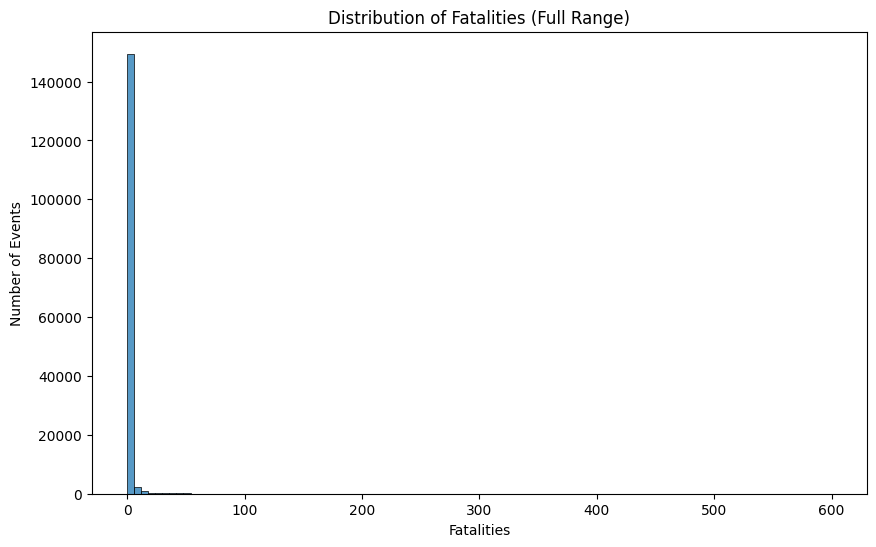

In [15]:
# checking whats skewing data
# basic histogram
plt.figure(figsize=(10,6))
sns.histplot(df['fatalities'], bins=100, kde=False)
plt.title('Distribution of Fatalities (Full Range)')
plt.xlabel('Fatalities')
plt.ylabel('Number of Events')
plt.show()

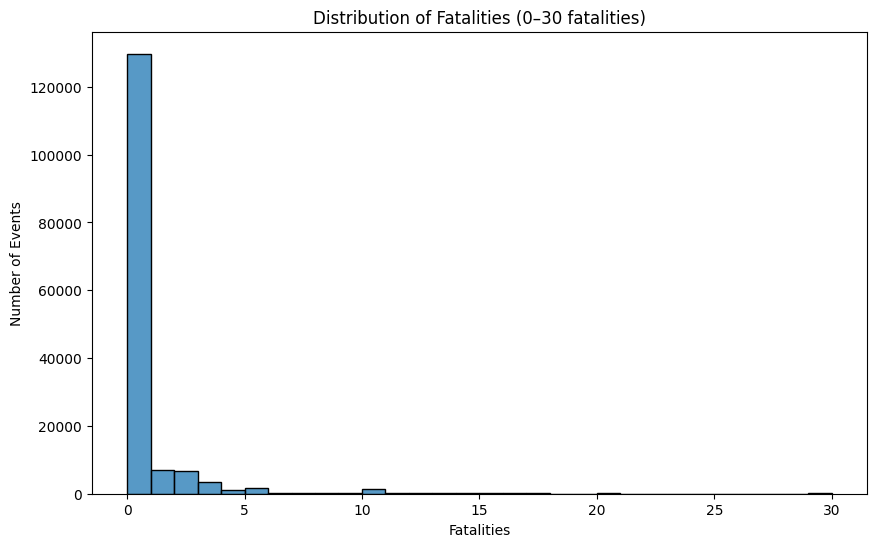

In [16]:
# zoomed in histogram (0-30 fatalities)
plt.figure(figsize=(10,6))
sns.histplot(df[df['fatalities'] <= 30]['fatalities'], bins=30, kde=False)
plt.title('Distribution of Fatalities (0–30 fatalities)')
plt.xlabel('Fatalities')
plt.ylabel('Number of Events')
plt.show()

In [17]:
# Display top 10 events with the highest fatalities
df.sort_values(by='fatalities', ascending=False).head(10)

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
118538,UKR89111,26 January 2023,2023,1,Political violence,Battles,Armed clash,Military Forces of Russia (2000-),NaN,External/Other forces,...,Bakhmut,48.5956,37.9999,2,Institute for the Study of War; Ministry of De...,Other,"On 26 January 2023, Ukrainian military forces ...",600,NaN,1675798463
77768,UKR136436,15 November 2023,2023,1,Political violence,Battles,Armed clash,Military Forces of Russia (2000-),Military Forces of Russia (2000-) Air Force,External/Other forces,...,Novoprokopivka,47.4198,35.8323,2,Deep State; Unian,National,"On 15 November 2023, Russian and Ukrainian mil...",594,NaN,1700602891
128938,UKR81485,05 November 2022,2022,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),NaN,State forces,...,Makiivka,49.2265,37.9863,2,Institute for the Study of War,Other,"On 5 November 2022, Ukrainian forces shelled a...",500,NaN,1738712998
129041,UKR80523,04 November 2022,2022,2,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),NaN,State forces,...,Makiivka,49.2265,37.9863,2,Novoye Vremya Ukraine; Ukrayinska Pravda,National,"Around 4 November 2022, Ukrainian forces kille...",500,NaN,1738712997
152653,UKR57975,11 May 2022,2022,1,Political violence,Battles,Armed clash,Military Forces of Ukraine (2019-),NaN,State forces,...,Bilohorivka,48.9259,38.2467,3,24 Channel; Institute for the Study of War; Uk...,Other-National,"On 11 May 2022, a Russian tank regiment attemp...",485,NaN,1653401104
108637,UKR99064,10 April 2023,2023,1,Political violence,Battles,Armed clash,Military Forces of Russia (2000-),Wagner Group,External/Other forces,...,Bakhmut,48.5956,37.9999,2,Institute for the Study of War; Ministry of De...,Other-National,"On 10 April 2023, Russian forces and Wagner gr...",450,NaN,1737495608
81747,UKR132349,19 October 2023,2023,1,Political violence,Battles,Armed clash,Military Forces of Russia (2000-),Military Forces of Russia (2000-) Air Force,External/Other forces,...,Avdiivka,48.1394,37.7497,2,Ministry of Defence of Ukraine; Novoye Vremya ...,Other-National,"On 19 October 2023, Russia and Ukrainian milit...",450,NaN,1738712888
52313,UKR160660,20 May 2024,2024,1,Political violence,Battles,Armed clash,Military Forces of Russia (2000-),NaN,External/Other forces,...,Pokrovsk,48.2810,37.1814,2,Ministry of Defence of Ukraine,Other,"On 20 May 2024, seven clashes between Russian ...",400,NaN,1738712924
137167,UKR71722,05 September 2022,2022,2,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),NaN,State forces,...,Kreminna,49.0495,38.2179,1,Novoye Vremya Ukraine; 24 Channel,National,"Around 5 September 2022 (week of), Ukrainian f...",400,NaN,1663096246
81774,UKR132434,18 October 2023,2023,1,Political violence,Battles,Armed clash,Military Forces of Ukraine (2019-),NaN,State forces,...,Zaporizhia,47.8479,35.1602,3,Novoye Vremya Ukraine,National,"On 18 October 2023, Ukrainian forces clashed w...",322,NaN,1698180619


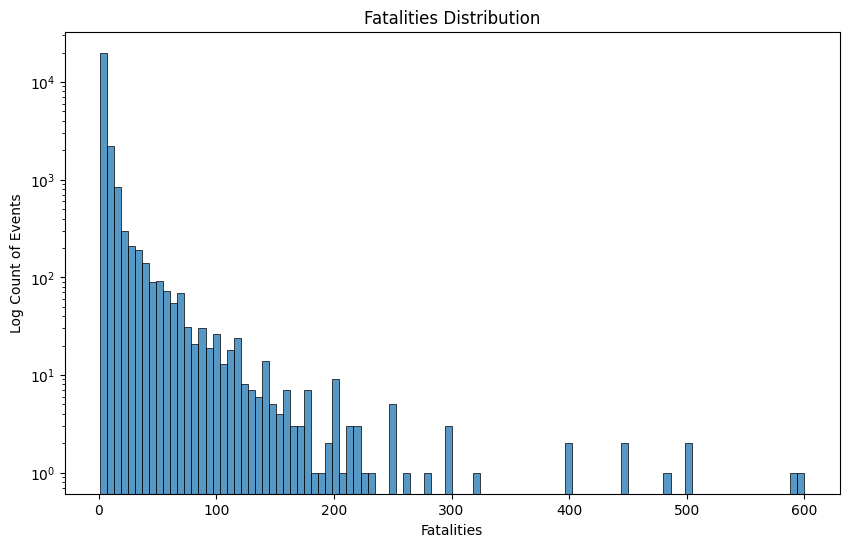

In [18]:
# flatten the skew
plt.figure(figsize=(10,6))
sns.histplot(df[df['fatalities'] > 0]['fatalities'], bins=100)
plt.yscale('log')
plt.title('Fatalities Distribution')
plt.xlabel('Fatalities')
plt.ylabel('Log Count of Events')
plt.show()

In [19]:
# filtering for events with high fatalities
high_fatal_df = df[df['fatalities'] > 20].sort_values(by='event_date') # if fatalities value is greater than 20
print(high_fatal_df[['event_date', 'country', 'region', 'location', 'fatalities', 'event_type', 'notes']])

              event_date  country  region            location  fatalities  \
58876      01 April 2024  Ukraine  Europe             Kherson          21   
3350       01 April 2025  Ukraine  Europe             Kherson          51   
3351       01 April 2025  Ukraine  Europe             Kherson          44   
92840     01 August 2023  Ukraine  Europe           Urozhaine         210   
125456  01 December 2022  Ukraine  Europe             Luhansk          75   
...                  ...      ...     ...                 ...         ...   
79988    31 October 2023  Ukraine  Europe             Kherson          52   
28053    31 October 2024  Ukraine  Europe  Vovchanski Khutory          29   
28052    31 October 2024  Ukraine  Europe           Vovchansk          29   
28044    31 October 2024  Ukraine  Europe             Kherson          63   
28050    31 October 2024  Ukraine  Europe             Kherson          26   

                        event_type  \
58876                      Battles   

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path

# Convert event_date
df["event_date"] = pd.to_datetime(df["event_date"], errors='coerce')
df["year"] = df["event_date"].dt.year

# Filter for high-fatality events (20+ deaths)
high_fatal = df[df["fatalities"] >= 20].copy()

# Create output folder for both PNG and HTML charts
Path("../static/attack_type_charts/PNG").mkdir(parents=True, exist_ok=True)
Path("../static/attack_type_charts/HTML").mkdir(parents=True, exist_ok=True)

# Filter for years 2022 through 2025
for year in [2022, 2023, 2024, 2025]:
    yearly_df = high_fatal[high_fatal["year"] == year]

    if yearly_df.empty:
        print(f"No high fatality data for {year}. Skipping.")
        continue

    # Group by sub_event_type and count
    attack_counts = yearly_df["sub_event_type"].value_counts().rename_axis("sub_event_type").reset_index(name="count")

    # Create Matplotlib plot (PNG)
    plt.figure(figsize=(10, 6))

    # Set dark background for the plot
    plt.style.use('dark_background')

    # Plotting the bar chart
    sns.barplot(
        data=attack_counts,
        x="count",
        y="sub_event_type",
        hue="sub_event_type",
        palette="Reds_r",  # Keeping the original color palette
        legend=False
    )

    # Set title and labels
    plt.title(f"High Fatality Events by Sub-Event Type – {year}", fontsize=14)
    plt.xlabel("Number of Events")
    plt.ylabel("Sub-Event Type")
    plt.tight_layout()

    # Save the figure with a dark background
    png_chart_path = f"../static/attack_type_charts/PNG/high_fatal_attack_types_{year}.png"
    plt.savefig(png_chart_path, facecolor='black')  # Save with dark background
    plt.close()
    print(f"Saved PNG chart: {png_chart_path}")

    # Create Plotly interactive bar chart (HTML)
    fig = px.bar(
        attack_counts,
        x="count",
        y="sub_event_type",
        orientation="h",
        title=f"High Fatality Events by Sub-Event Type – {year}",
        color="sub_event_type",  # Color each bar by its type
        labels={"count": "Number of Events", "sub_event_type": "Sub-Event Type"},
        color_discrete_sequence=px.colors.sequential.Reds
    )

    # Customize the layout for Plotly chart (dark background)
    fig.update_layout(
        xaxis_title="Number of Events",
        yaxis_title="Sub-Event Type",
        xaxis=dict(tickmode="linear"),
        template="plotly_dark",  # Use a dark theme for the Plotly chart
        showlegend=True,  # Show the legend
        margin={"l": 100, "r": 50, "t": 100, "b": 50},  # Adjust margins for better spacing
        title_font=dict(size=24),  # Increase title font size for clarity
        xaxis_title_font=dict(size=16),  # Customize axis title font size
        yaxis_title_font=dict(size=16),
        font=dict(family="Arial", size=14),  # Use a clean font for the chart
    )

    # Save the interactive Plotly chart as an HTML file
    html_chart_path = f"../static/attack_type_charts/HTML/high_fatal_attack_types_{year}.html"
    fig.write_html(html_chart_path)
    print(f"Saved HTML chart: {html_chart_path}")

Saved PNG chart: ../static/attack_type_charts/PNG/high_fatal_attack_types_2022.png
Saved HTML chart: ../static/attack_type_charts/HTML/high_fatal_attack_types_2022.html
Saved PNG chart: ../static/attack_type_charts/PNG/high_fatal_attack_types_2023.png
Saved HTML chart: ../static/attack_type_charts/HTML/high_fatal_attack_types_2023.html
Saved PNG chart: ../static/attack_type_charts/PNG/high_fatal_attack_types_2024.png
Saved HTML chart: ../static/attack_type_charts/HTML/high_fatal_attack_types_2024.html
Saved PNG chart: ../static/attack_type_charts/PNG/high_fatal_attack_types_2025.png
Saved HTML chart: ../static/attack_type_charts/HTML/high_fatal_attack_types_2025.html


In [38]:
# Making visual on high casualty attacks ( 20 or more) per year 
# Ensure event_date column is in datetime format
df["event_date"] = pd.to_datetime(df["event_date"], errors='coerce')

# Filter for high fatality events (20 or more fatalities)
high_fatal = df[df["fatalities"] >= 20].copy()

# Extract year for grouping
high_fatal["year"] = high_fatal["event_date"].dt.year

# Create output directory
Path("../static/high_fatality_maps_by_year/").mkdir(parents=True, exist_ok=True)

# Loop through each year and generate individual maps
for year in sorted(high_fatal["year"].dropna().unique()):
    yearly_df = high_fatal[high_fatal["year"] == year]

    features = []
    for _, row in yearly_df.iterrows():
        feature = {
            'type': 'Feature',
            'geometry': {
                'type': 'Point',
                'coordinates': [row['longitude'], row['latitude']]
            },
            'properties': {
                'time': row['event_date'].strftime('%Y-%m-%dT%H:%M:%S'),
                'popup': f"{row['location']}<br>Fatalities: {row['fatalities']}<br>Date: {row['event_date'].date()}",
                'icon': 'circle',
                'iconstyle': {
                    'fillColor': 'red',
                    'fillOpacity': 0.7,
                    'stroke': 'true',
                    'radius': min(20, row['fatalities'] / 5)
                }
            }
        }
        features.append(feature)

    if not features:
        continue

    # Create the map
    m = folium.Map(location=[48.3794, 31.1656], zoom_start=6, tiles='CartoDB dark_matter')
    
    # Add TimestampedGeoJson
    TimestampedGeoJson({
        'type': 'FeatureCollection',
        'features': features,
    },
    period='P1D',
    add_last_point=True,
    auto_play=True,
    loop=False,
    max_speed=1,
    loop_button=True,
    date_options='YYYY-MM-DD',
    time_slider_drag_update=True).add_to(m)

    # Save the map
    map_path = f"../static/high_fatality_maps_by_year/high_fatality_events_{year}.html"
    m.save(map_path)
    print(f"Saved: {map_path}")


Saved: ../static/high_fatality_maps_by_year/high_fatality_events_2022.html
Saved: ../static/high_fatality_maps_by_year/high_fatality_events_2023.html
Saved: ../static/high_fatality_maps_by_year/high_fatality_events_2024.html
Saved: ../static/high_fatality_maps_by_year/high_fatality_events_2025.html


In [40]:
# Making PNG graphs of attack types with dark bckgrnd
# Convert event_date
df["event_date"] = pd.to_datetime(df["event_date"], errors='coerce')
df["year"] = df["event_date"].dt.year

# Filter for high-fatality events (20+ deaths)
high_fatal = df[df["fatalities"] >= 20].copy()

# Create output folder
Path("../static/attack_type_charts/PNG").mkdir(parents=True, exist_ok=True)

# Filter for years 2022 through 2025
for year in [2022, 2023, 2024, 2025]:
    yearly_df = high_fatal[high_fatal["year"] == year]

    if yearly_df.empty:
        print(f"No high fatality data for {year}. Skipping.")
        continue

    # Group by sub_event_type and count
    attack_counts = yearly_df["sub_event_type"].value_counts().rename_axis("sub_event_type").reset_index(name="count")
    
    # Create the plot
    plt.figure(figsize=(10, 6))

    # Set dark background for the plot
    plt.style.use('dark_background')

    # Plotting the bar chart
    sns.barplot(
        data=attack_counts,
        x="count",
        y="sub_event_type",
        hue="sub_event_type",
        palette="Reds_r",  # Keeping the original color palette
        legend=False
    )

    # Set title and labels
    plt.title(f"High Fatality Events by Sub-Event Type – {year}", fontsize=14)
    plt.xlabel("Number of Events")
    plt.ylabel("Sub-Event Type")
    plt.tight_layout()

    # Save the figure with a dark background
    chart_path = f"../static/attack_type_charts/PNG/high_fatal_attack_types_{year}.png"
    plt.savefig(chart_path, facecolor='black')  # Save with dark background
    plt.close()
    print(f"Saved chart: {chart_path}")


Saved chart: ../static/attack_type_charts/PNG/high_fatal_attack_types_2022.png
Saved chart: ../static/attack_type_charts/PNG/high_fatal_attack_types_2023.png
Saved chart: ../static/attack_type_charts/PNG/high_fatal_attack_types_2024.png
Saved chart: ../static/attack_type_charts/PNG/high_fatal_attack_types_2025.png
